In [1]:
### Importing the necessary libraries ###
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature


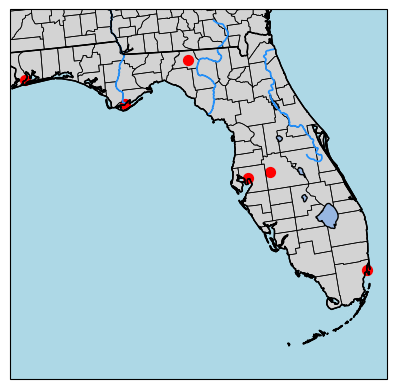

In [33]:
### Creating map of Florida ###
fig, axes = plt.subplots(1, 1, subplot_kw={'projection': ccrs.LambertConformal()})
axes.set_extent([-87.5, -80.0, 24.5, 31.0], crs=ccrs.PlateCarree())
counties = cfeature.NaturalEarthFeature(category='cultural', name='admin_2_counties', scale='10m', facecolor='none', linewidth=0.5)
axes.add_feature(counties, edgecolor='black')
axes.add_feature(cfeature.LAND, facecolor='lightgray')
axes.add_feature(cfeature.COASTLINE, edgecolor='black')
axes.add_feature(cfeature.BORDERS, edgecolor='black')
axes.add_feature(cfeature.LAKES, edgecolor='black')
axes.add_feature(cfeature.RIVERS, edgecolor='dodgerblue', linewidth = 1.25 )
axes.add_feature(cfeature.STATES, edgecolor='black')
axes.add_feature(cfeature.LAND, facecolor='lightgray')
axes.add_feature(cfeature.OCEAN, facecolor='lightblue')

### Creating Points for the Cities being analyzed ###
Tampa = [27.9475, -82.4584]
Miami = [25.7617, -80.1918]
Apalachicola = [29.7257, -84.9828]
Madison = [30.4461, -83.4193]
Bartow = [27.8954, -81.8405]
Pensicola = [30.4213, -87.2169]

### Plotting those points on the map ###
axes.scatter(Tampa[1], Tampa[0], color='red', marker='o', s=50, label='Tampa', transform=ccrs.PlateCarree(), zorder = 1)
axes.scatter(Miami[1], Miami[0], color='red', marker='o', s=50, label='Miami', transform=ccrs.PlateCarree(), zorder = 1)   
axes.scatter(Apalachicola[1], Apalachicola[0], color='red', marker='o', s=50, label='Apalachicola', transform=ccrs.PlateCarree(),zorder = 1)
axes.scatter(Madison[1], Madison[0], color='red', marker='o', s=50, label='Madison', transform=ccrs.PlateCarree(), zorder = 1)
axes.scatter(Lakeland[1], Lakeland[0], color='red', marker='o', s=50, label='Lakeland', transform=ccrs.PlateCarree(), zorder = 1)  
axes.scatter(Pensicola[1], Pensicola[0], color='red', marker='o', s=50, label='Pensicola', transform=ccrs.PlateCarree(), zorder = 1)




Figure saved as Apalachicola_climate_data.png
Figure saved as Bartow_climate_data.png
Figure saved as Tampa_climate_data.png
Figure saved as Miami_climate_data.png
Figure saved as Madison_climate_data.png
Figure saved as Pensacola_climate_data.png


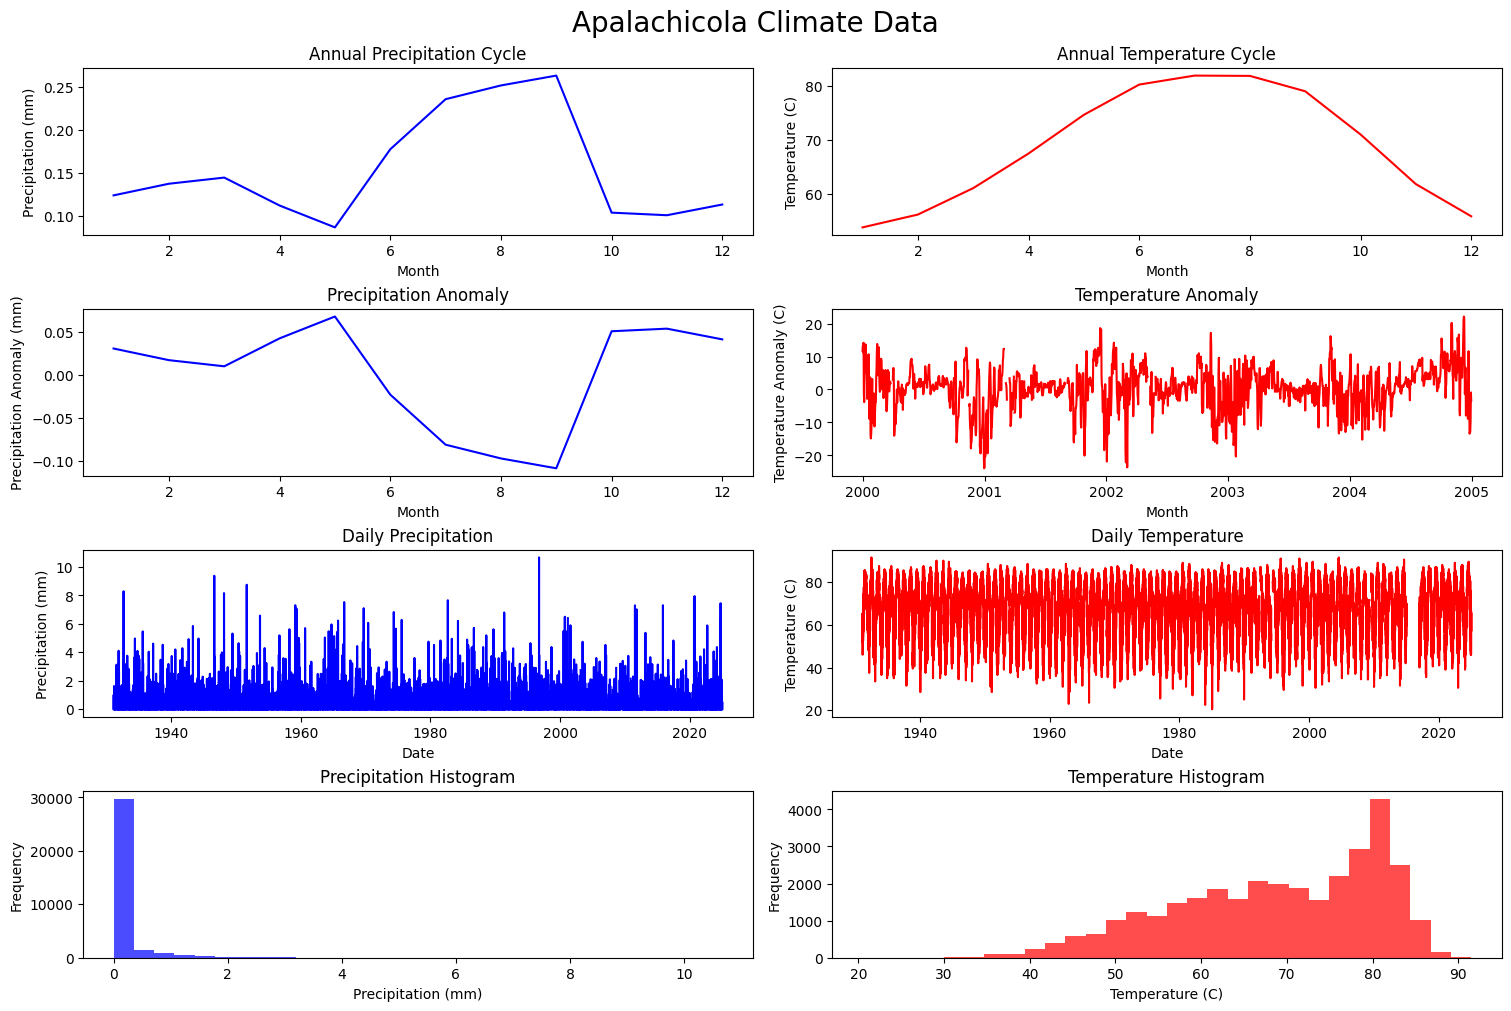

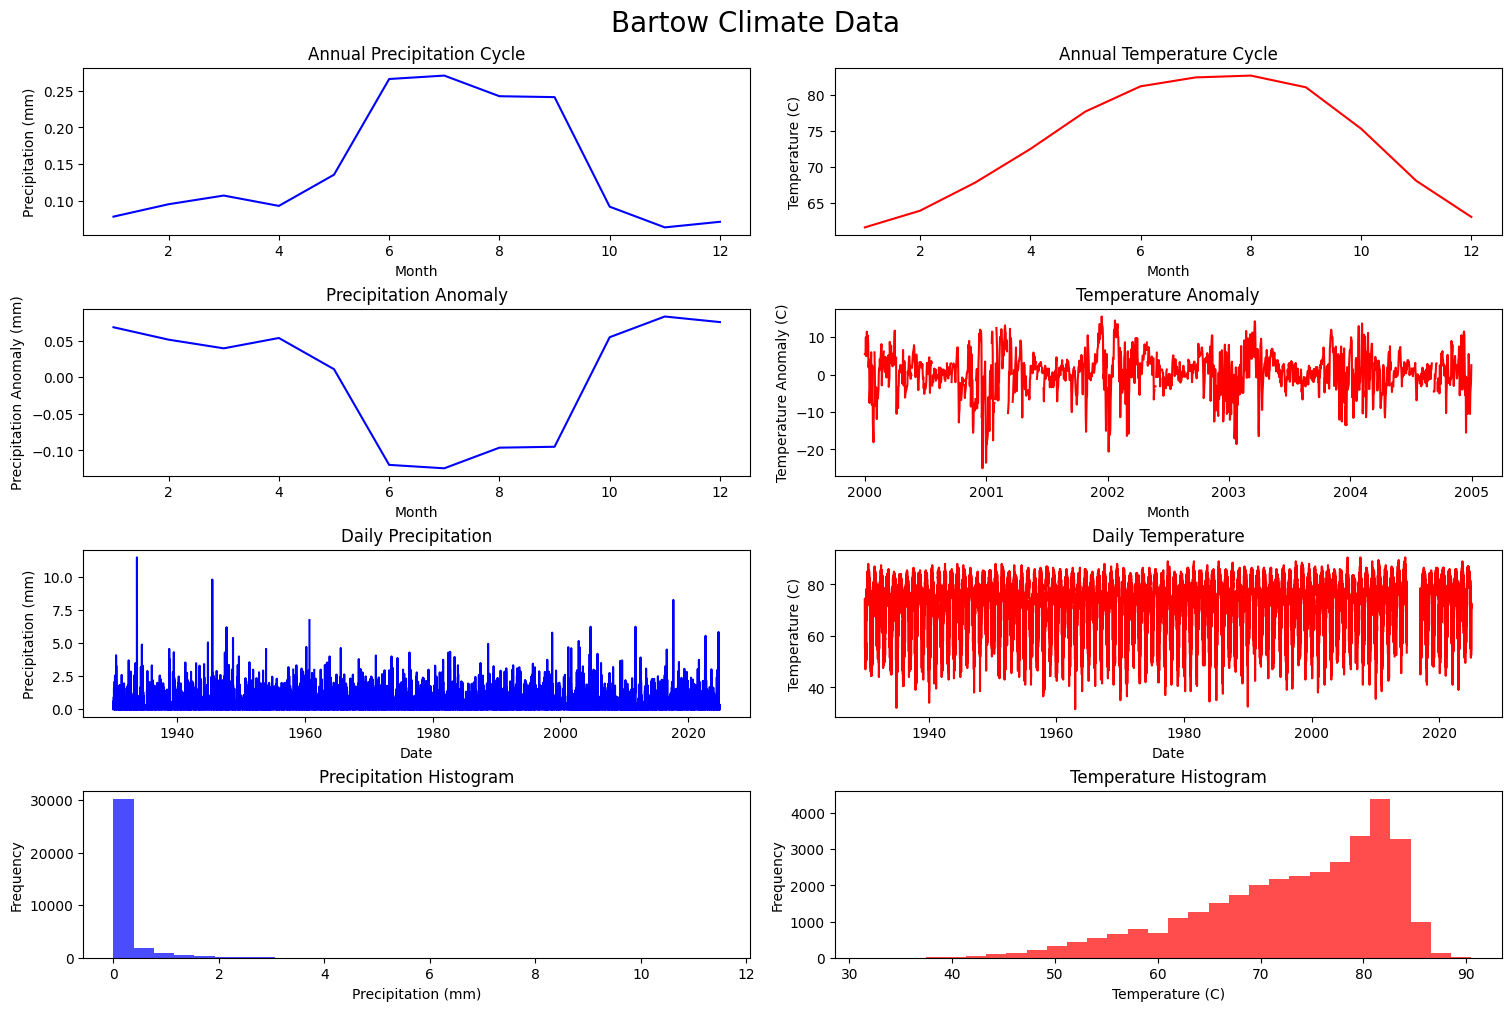

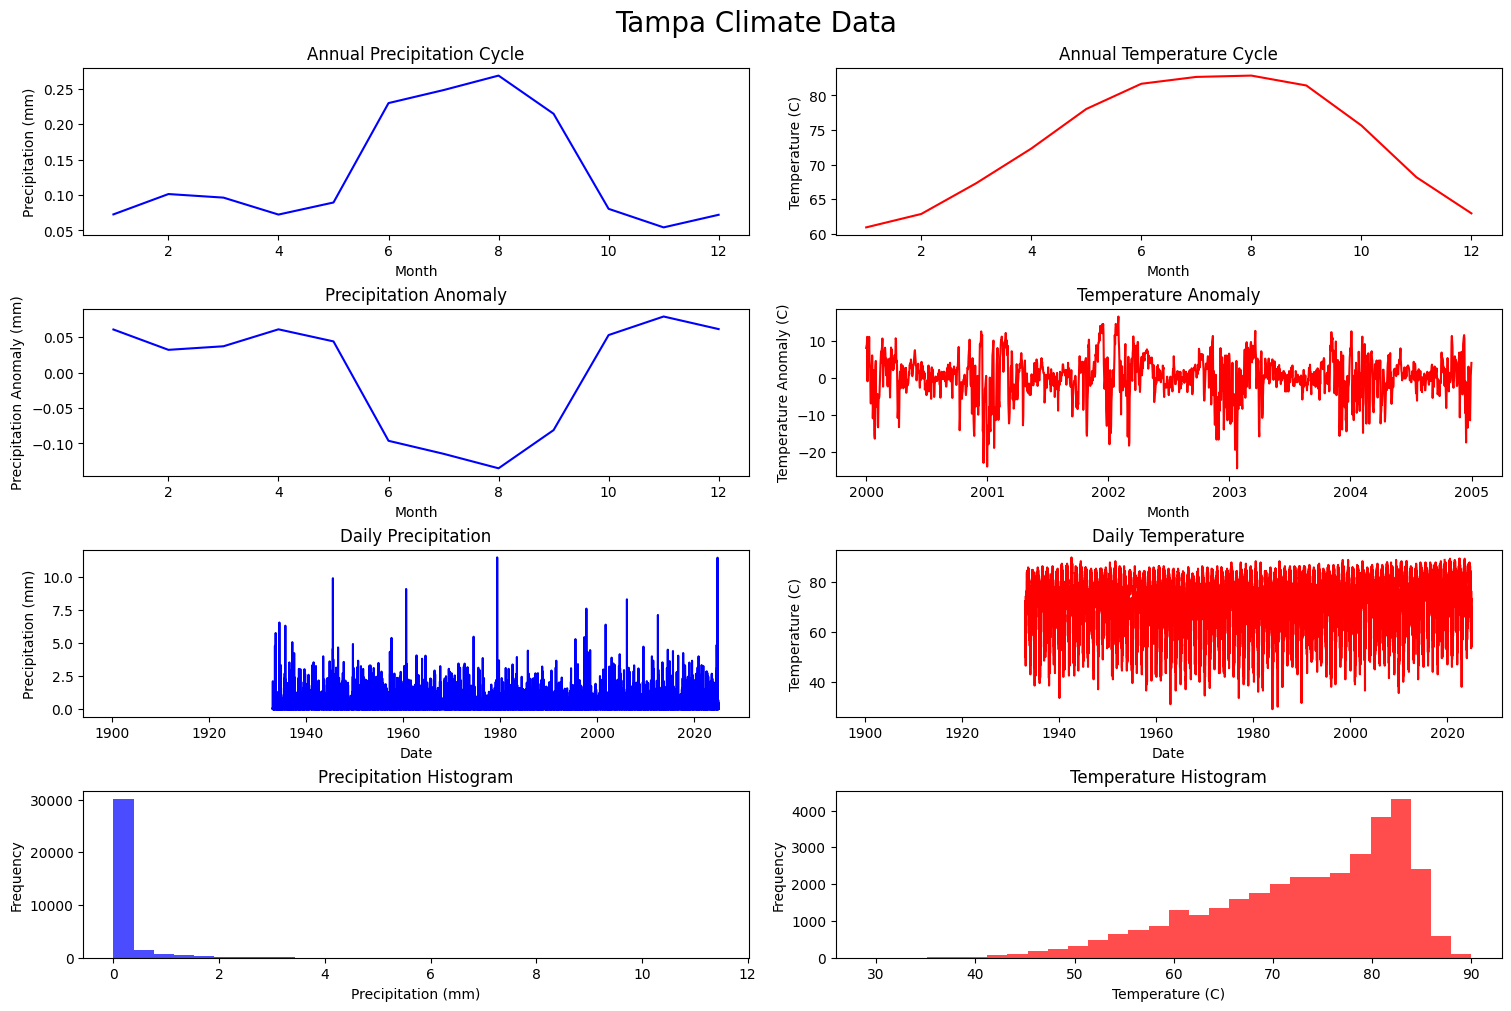

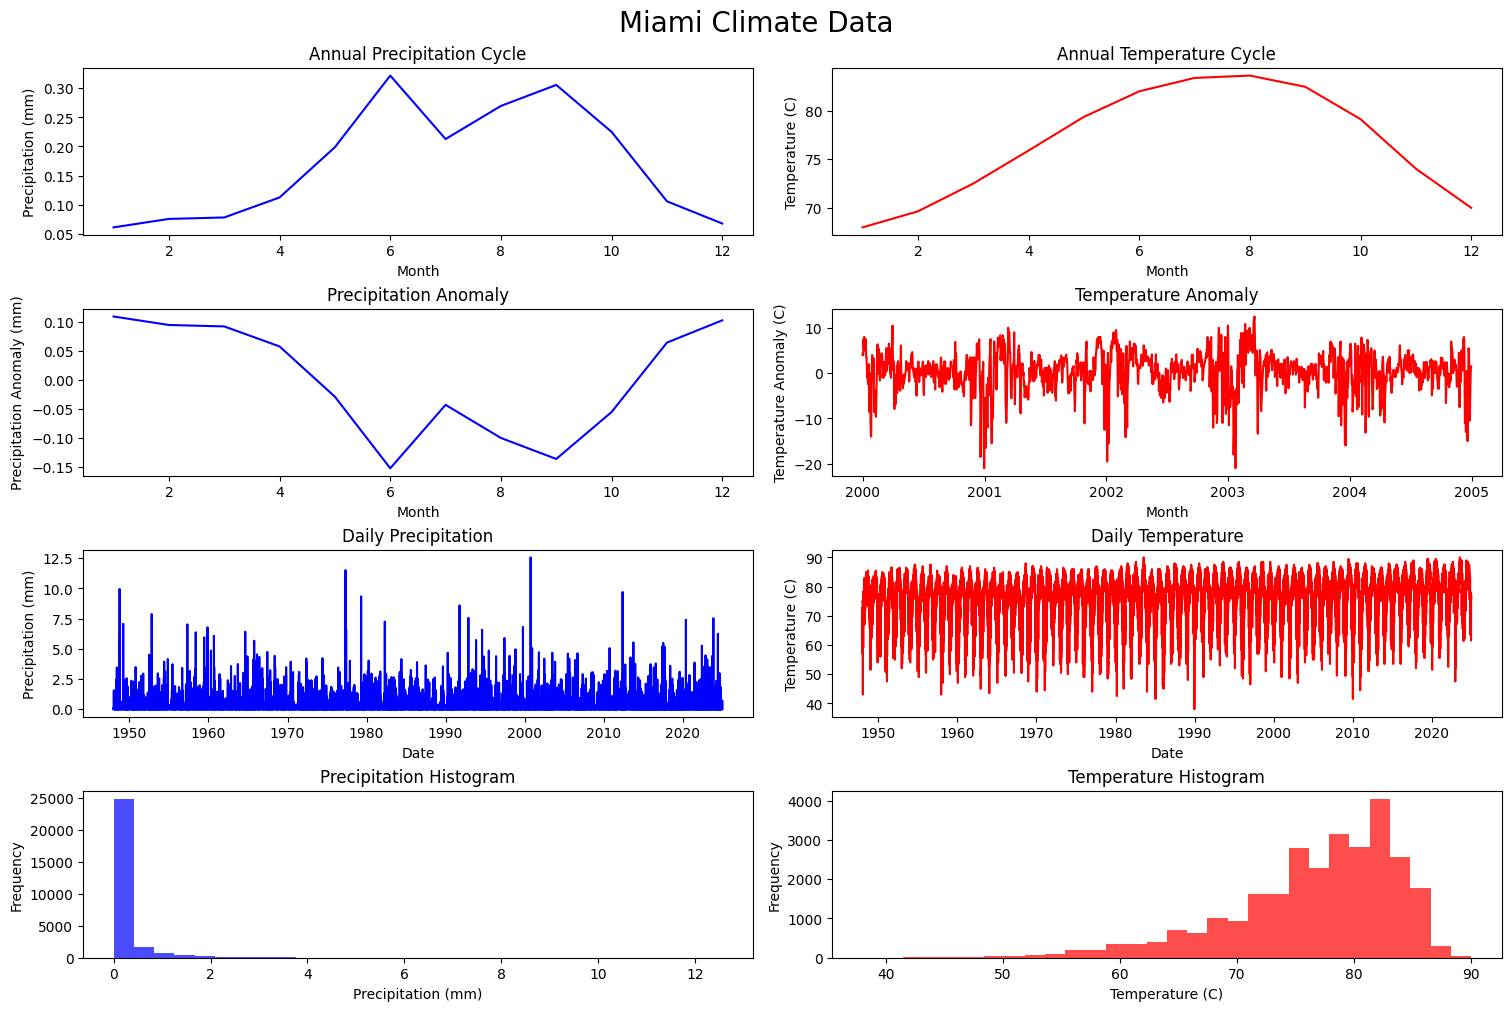

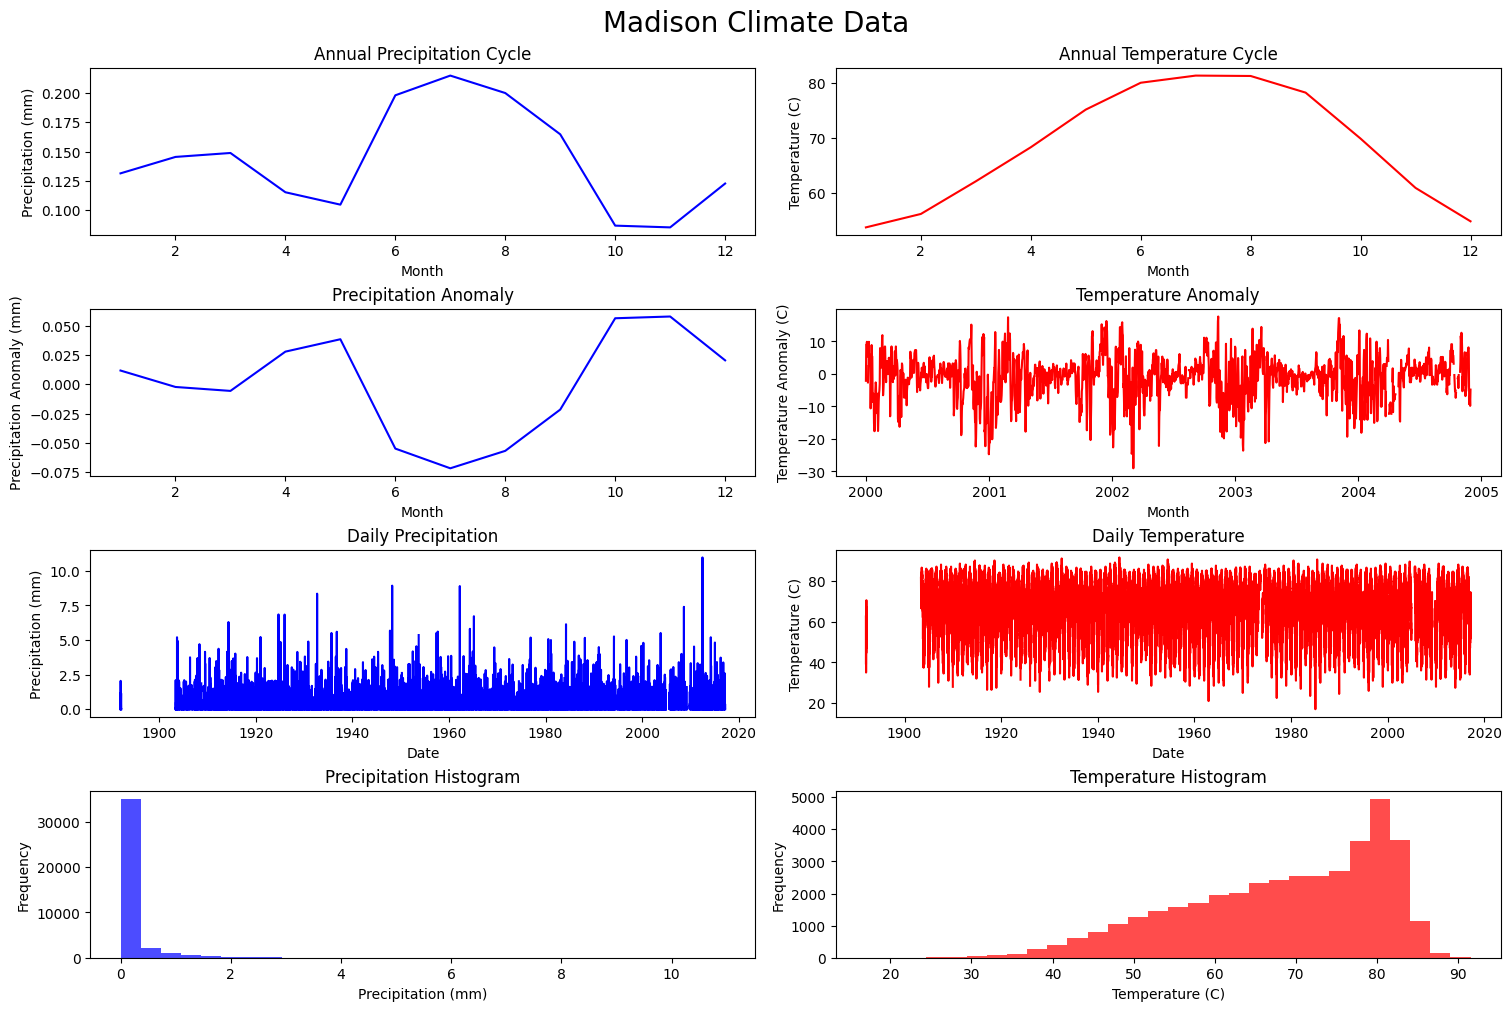

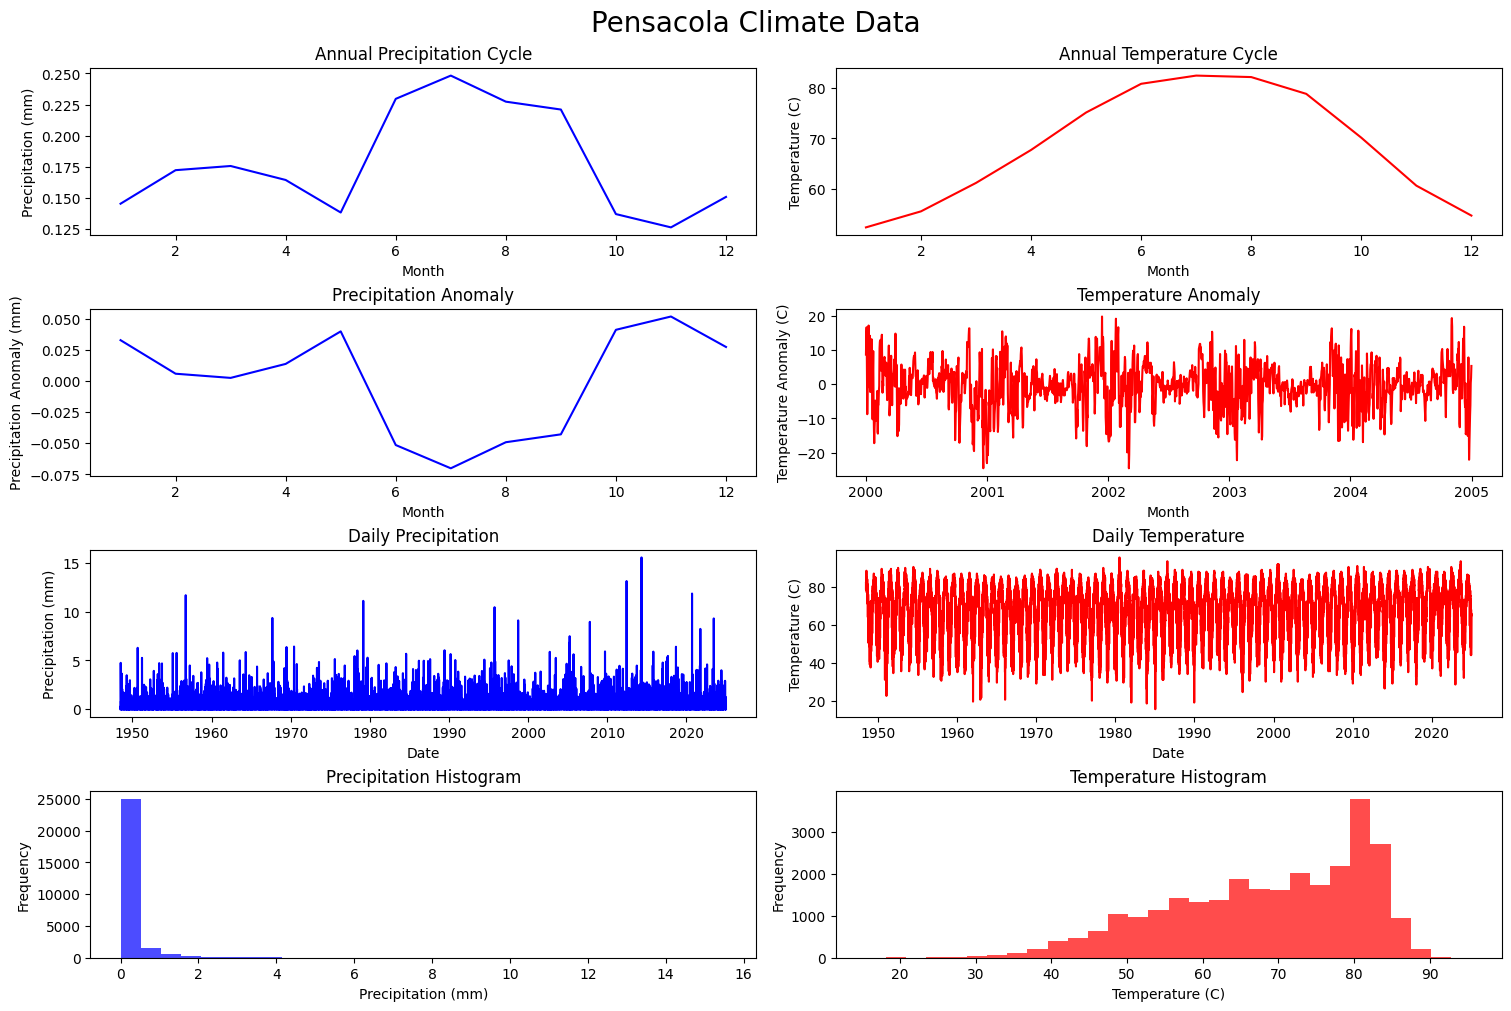

In [ ]:
### Defining a function to plot and read the data for cities ###
def plot_city_data(city_name, save_fig = False):
    '''Function to read the city name, and plot the data for that city '''

    ### Reading the Data for the city ###
    city_data = pd.read_csv(f'data/{city_name}_data.csv', skipinitialspace=True,
                             na_values = [-99.9, -99.99, -99.90000, -99.9999, -99.999999, -99.9999999, -99.90000000])
    city_data['date'] = pd.to_datetime(city_data[['YEAR', 'MONTH','DAY']], errors = 'coerce')
    city_data = city_data.dropna(subset='date')
    city_data = city_data.drop(columns=['YEAR', 'MONTH', 'DAY'])
    city_data = city_data.set_index('date')
    city_precip = city_data['PRECIPITATION']
    city_temp = city_data['MEAN TEMP']
    city_precip_mean = city_precip.mean()
    city_temp_mean = city_temp.mean()
    ### Annual Cycle of Precip and Temp ### 
    city_precip_ancycle = city_precip.groupby(city_precip.index.month).mean()
    city_temp_ancycle = city_temp.groupby(city_temp.index.month).mean()
    ### Anomaly Data precip and temp ###
    city_precip_anomaly = city_precip_mean - city_precip_ancycle
    ### Select 4 year time period to find synoptic temperature anomalies for temperature ###
    city_data['Monthly Mean Temp'] = city_data.index.month.map(city_temp_ancycle)
    city_temp_anom = city_data['MEAN TEMP'] - city_data['Monthly Mean Temp']
    city_temp_anom = city_temp_anom.loc['2000-01-01':'2004-12-31']
    ### Plotting the Data ###
    fig, axes = plt.subplots(4, 2, figsize=(15, 10), constrained_layout=True)
    ### Plotting the General Data ###
    axes[0,0].plot(city_precip_ancycle.index, city_precip_ancycle, color='blue')
    axes[0,1].plot(city_temp_ancycle.index, city_temp_ancycle, color='red')
    axes[1,0].plot(city_precip_anomaly.index, city_precip_anomaly, color='blue')
    axes[1,1].plot(city_temp_anom.index, city_temp_anom, color='red')
    axes[2,0].plot(city_precip.index, city_precip, color='blue')
    axes[2,1].plot(city_temp.index, city_temp, color='red')
    axes[3,0].hist(city_precip, bins=30, color='blue', alpha=0.7)
    axes[3,1].hist(city_temp, bins=30, color='red', alpha=0.7)
    ### Adding titles and Lables to the plots ###
    fig.suptitle(f'{city_name} Climate Data', fontsize = 20) # Adding subtitle to figure to easily identify the city
    ### Addind Axes titles ###
    axes[0,0].set_title('Annual Precipitation Cycle')
    axes[0,1].set_title('Annual Temperature Cycle')
    axes[1,0].set_title('Precipitation Anomaly')
    axes[1,1].set_title('Temperature Anomaly')
    axes[2,0].set_title('Daily Precipitation')
    axes[2,1].set_title('Daily Temperature')
    axes[3,0].set_title('Precipitation Histogram')
    axes[3,1].set_title('Temperature Histogram')
   ### Adding Y axis labels for each axes ###
    axes[0,0].set_ylabel('Precipitation (mm)')
    axes[0,1].set_ylabel('Temperature (C)')
    axes[1,0].set_ylabel('Precipitation Anomaly (mm)')
    axes[1,1].set_ylabel('Temperature Anomaly (C)')
    axes[2,0].set_ylabel('Precipitation (mm)')
    axes[2,1].set_ylabel('Temperature (C)')
    axes[3,0].set_ylabel('Frequency')
    axes[3,1].set_ylabel('Frequency')
    ### Adding X axis labels for each axes ###
    axes[3,0].set_xlabel('Precipitation (mm)')
    axes[3,1].set_xlabel('Temperature (C)')
    axes[0,0].set_xlabel('Month')
    axes[0,1].set_xlabel('Month')
    axes[1,0].set_xlabel('Month')
    axes[1,1].set_xlabel('Month')
    axes[2,0].set_xlabel('Date')
    axes[2,1].set_xlabel('Date')
    if save_fig:
        filename = f'{city}_climate_data.png'
        plt.savefig(filename, dpi=300)
        print(f"Figure saved as {filename}")
    return(city_precip, city_temp)

### Creating a loop to call the function for each city ###
Dict = {}
cities = ['Apalachicola', 'Bartow', 'Tampa', 'Miami', 'Madison', 'Pensacola']
for city in cities:
    ### Calling the Function for Each City ###
    ##################################################################################################################
    ########## Note if you want to save the figures set the save_fig parameter to True (save_fig = True) #############
    ##################################################################################################################
    Dict[city] = plot_city_data(city, save_fig = False)

In [32]:
### Creating a Table to show max, min, mean, and std of the data ###
data = pd.DataFrame(Dict, index = ['Precip', 'Temp'])
print ('City', f'{'Mean Precip (mm)':>25}', f'{'Mean Temp (ºF)':>16}', f'{'Max Precip (mm)':>16}', f'{'Max Temp (ºF)':>15}',
       f'{'Std Precip (mm)':>16}', f'{'Std Temp (ºF)':>16}', f'{'Standard Error':>16}', f'{'Temp Increase (ºF)':>20}', f'{'p-value':>10}')  
print ('-'*175)
for city in cities: 
    ### Finding the mean of the data ###
   mean_precip = data[city]['Precip'].mean()
   mean_temp = data[city]['Temp'].mean()
   max_precip = data[city]['Precip'].max()
   max_temp = data[city]['Temp'].max()
   std_precip, std_temp = data[city]['Precip'].std(), data[city]['Temp'].std()
## Finding the temp increase per decade ##
   temp_increase = data[city]['Temp'].resample('10YE').mean().dropna()
   years = temp_increase.index.year
   temps = temp_increase.values
   slope, intercept, r_value, p_value, std_err = stats.linregress(years, temps)
   print(f'{city:<12}', f'{mean_precip:>12.3f}', f'{mean_temp:>16.3f}', f'{max_precip:>16.3f}', f'{max_temp:>16.3f}',
         f'{std_precip:>16.3f}', f'{std_temp:>16.3f}', f'{slope:>16.3f}', f'{std_err:>16.3f}', f'{p_value:>16.3f}')




City          Mean Precip (mm)   Mean Temp (ºF)  Max Precip (mm)   Max Temp (ºF)  Std Precip (mm)    Std Temp (ºF)   Standard Error   Temp Increase (ºF)    p-value
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Apalachicola        0.154           68.860           10.670           91.500            0.503           11.964           -0.004            0.013            0.771
Bartow              0.146           73.154           11.500           90.500            0.427            9.476            0.025            0.005            0.000
Tampa               0.134           73.129           11.450           90.000            0.422            9.832            0.050            0.009            0.001
Miami               0.170           76.698           12.560           90.000            0.504            7.168            0.035            0.010            0.011
Madison     